# Data Exploration and Analysis

## Importing libraries

In [1]:
import pandas as pd

## Importing data

In [2]:
df_french = pd.read_csv("Data/french_tweets.csv")
df_langs = pd.read_csv("Data/language_detection_dataset.csv")

### French tweets data

In [3]:
df_french.shape

(1526724, 2)

In [4]:
df_french.columns

Index(['label', 'text'], dtype='object')

In [5]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526724 entries, 0 to 1526723
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1526724 non-null  int64 
 1   text    1526724 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.3+ MB


In [6]:
df_french['label'].value_counts()

label
0    771604
1    755120
Name: count, dtype: int64

<Axes: >

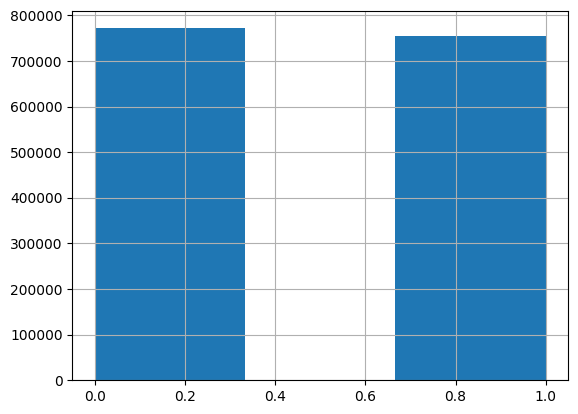

In [7]:
df_french['label'].hist(bins=3)

### Languages data

In [8]:
df_langs.shape

(70000, 2)

In [9]:
df_langs.columns

Index(['lab4', 'text'], dtype='object')

In [10]:
df_langs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lab4    70000 non-null  int64 
 1   text    70000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


<Axes: >

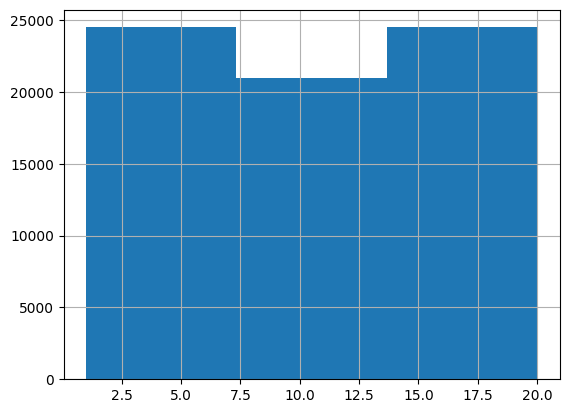

In [11]:
df_langs['lab4'].hist(bins=3)

## Cleaning Data

### French tweets data

In [12]:
df_french.isna().sum()

label    0
text     0
dtype: int64

In [13]:
df_french.duplicated().sum()

51480

In [14]:
df_french = df_french.drop_duplicates(subset=['text'])

In [15]:
df_french.duplicated().sum()

0

In [16]:
df_french = df_french.sample(frac=1).reset_index(drop=True)

In [17]:
df_french.sample(5)

,label,text
1454372,0,Personne à l'exception de la femme de ménage. ...
426994,0,Oiiii vous venez toujours en aussie mais jamai...
971141,0,Vous n'êtes pas le seul 1. plusieurs autres de...
1094349,1,Anne et ryan bowling day où je reviens
75781,0,Ne le dites pas !!! prier pour moi!


In [18]:
df_french_grouped = df_french.groupby(['label'])
df_french = df_french_grouped.apply(lambda x:x.sample(df_french_grouped.size().min()).reset_index(drop=True))

df_french = df_french.droplevel(['label'])

In [19]:
df_french['label'].value_counts()

label
0    724894
1    724894
Name: count, dtype: int64

### Langs data

In [20]:
df_langs.isna().sum()

lab4    0
text    0
dtype: int64

In [21]:
df_langs.duplicated().sum()

1020

In [22]:
df_langs = df_langs.drop_duplicates(subset=['text'])

In [23]:
df_langs.duplicated().sum()

0

In [24]:
df_langs = df_langs.sample(frac=1).reset_index(drop=True)

In [25]:
df_langs.sample(10)

,lab4,text
16366,4,"Τζούντιθ , ήταν υπέροχο να κάνω αυτό το κομμάτ..."
41468,10,タイトルの通りですが、18Vが認識しませんでした。それとノイズが非常にうるさく、とても耐えら...
49521,4,Καθιστά ενδογενή όλα τα φυσικά χαρακτηριστικά ...
58837,2,първата стъпка-преглед на съществуваща информа...
4181,4,Οι επιπτώσεις αυτές παραμένουν ακαθόριστη για ...
16101,14,"Правильно или по крайней мере кредиты , которы..."
11131,3,Artikel war schnell da und alles war ok. Die L...
62260,8,इस दृश ् य से पॉल है है .
43381,4,"Η Ευρώπη , αν και απρόθυμα , παραδέχτηκε την Κ..."
12934,5,"Stylish, black , reasonably priced with gold t..."


In [26]:
df_langs['lab4'].value_counts()

lab4
10    3500
5     3499
3     3499
6     3498
7     3495
20    3491
1     3464
8     3464
19    3464
2     3464
17    3464
15    3463
14    3463
16    3463
4     3463
18    3456
13    3350
9     3346
11    3338
12    3334
Name: count, dtype: int64

## Exporting data

In [27]:
df_french.to_csv("Data/analyzed_french_tweets.csv", index=None)

In [28]:
df_langs.to_csv("Data/analyzed_langs_dataset.csv", index=None)